In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as inte
from numpy import matmul as mm

In [2]:
def rdivide(A,B):
    c,low = cho_factor(B.T)
    K = cho_solve((c,low),A.T).T
    return C
def ldivide(A,B):
    c,low = cho_factor(A)
    tmp = cho_solve((c,low),B)
    return C

In [3]:
def circle(x,y,r):
    ang = np.arange(0,2*np.pi,0.01)
    xp = r*np.cos(ang)
    yp = r*np.sin(ang)
    plt.plot(x+xp,y+yp,color='k',linewidth=2)

In [4]:
def eom(params,th,phi,dth,dphi,u):
    A = params['mr']*params['r']*params['d']*np.cos(phi)
    B = params['ir']+params['mr']*(params['d']**2)
    C = params['mr']*params['g']*params['d']
    D = params['mr']*(params['r']**2)
    E = params['r']*params['mr']*params['d']*np.cos(phi) 
    F = params['mr']*params['r']*params['d']
    tau = u
    tmp1 = A*F*np.sin(phi)*dphi**2-C*D*np.sin(phi)+(A+D)*tau
    tmp2 = A*E-B*D; phidd = tmp1/tmp2
    thdd = -((A+B)*phidd-C*np.sin(phi)+tau)/A
    qdd = np.array([thdd,phidd])
    return qdd

In [5]:
params = {}; params['g'] = 9.81
params['mr'] = .25; params['ir'] = .0001
params['d'] = .1; params['r'] = .02

eom(params, np.pi/4, np.pi/2, np.pi/6, np.pi/6, 1)

array([7252.52718023, -290.28846154])

In [6]:
def dynamics(params,t,X):
    Xd = np.zeros(X.shape);u=0
    th,phi,dth,dphi = X[0],X[1],X[2],X[3]
    Xd[:2] = X[2:]
    Xd[2:] = eom(params,th,phi,dth,dphi,u)
    return Xd
def robotSim():
    params = {}; params['g'] = 9.81
    params['mr'] = .25; params['ir'] = .0001
    params['d'] = .1; params['r'] = .02
    t0,t1 = 0,2; y0 = np.array([0,1,0,0])
    t = np.linspace(t0,t1,445)
    y = np.zeros((len(t),len(y0))); y[0,:] = y0
    r = inte.ode(lambda t,y:dynamics(params,t,y)).set_integrator("dopri5") 
    r.set_initial_value(y0, t0)   # initial values
    for i in range(1, t.size):
        y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
        if not r.successful():
           raise RuntimeError("Could not integrate")
    return t,y

In [7]:
t,y = robotSim()

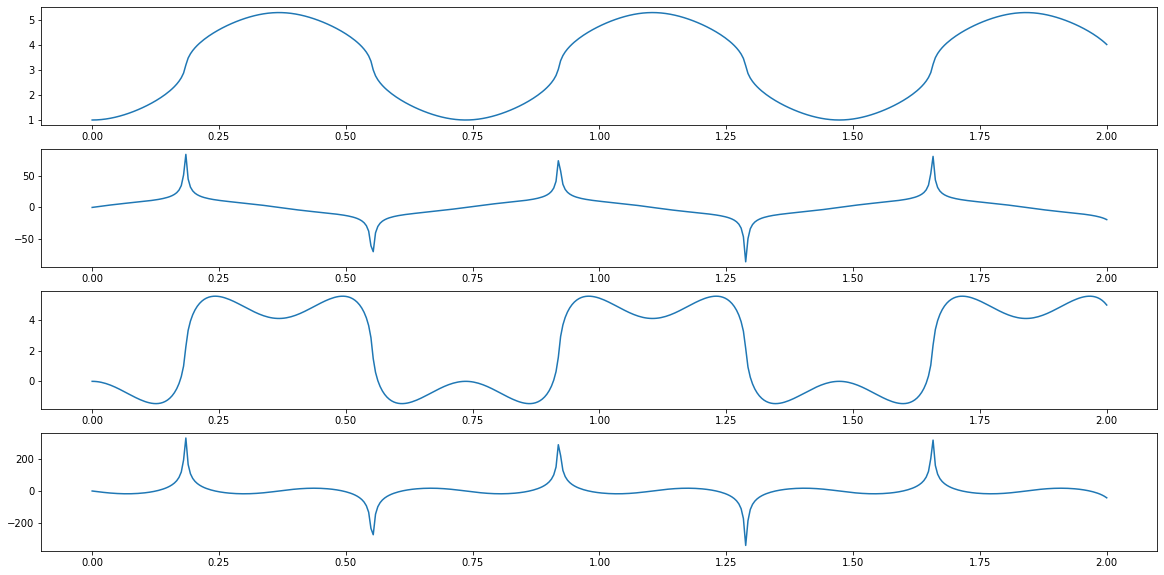

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
plt.plot(t,y[:,1])

plt.subplot(4,1,2)
plt.plot(t,y[:,3])

plt.subplot(4,1,3)
plt.plot(t,y[:,0])

plt.subplot(4,1,4)
plt.plot(t,y[:,2])

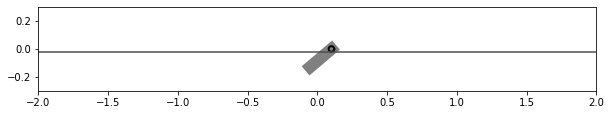

In [9]:
fig = plt.figure(figsize=(10,10))
plt.ylim([-.3,.3]); plt.xlim([-2,2])
ax = plt.gca()
i = -1
th,phi,dth,dphi = y[i,0],y[i,1],y[i,2],y[i,3]
x = th*.02
plt.ylim([-.3,.3]); plt.xlim([-2,2])
plt.gca().set_aspect('equal', adjustable='box')
ax.plot(np.array([x,x+.1*2*np.sin(phi)]),
        np.array([0,2*.1*np.cos(phi)]),
        color=.5*np.array([1,1,1]),linewidth=12)
circle(x,0,.02)
ax.plot(np.array([-2,2]),
       np.array([-.02,-.02]),
       color=.3*np.array([1,1,1]))  

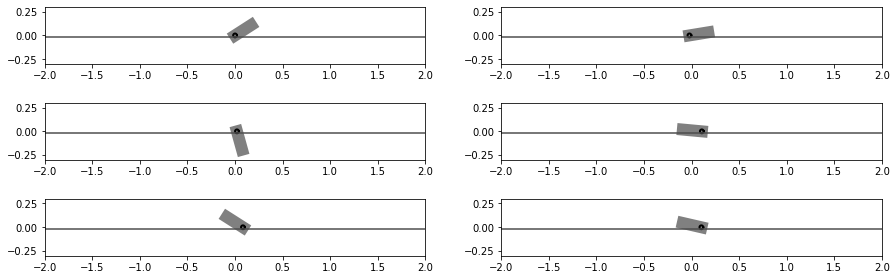

In [10]:
fig = plt.figure(figsize=(15,5))
plt.ylim([-.3,.3]); plt.xlim([-2,2])
j=0
for i in np.array([0,20,40,60,80,100]):
    ax = plt.subplot(3,2,j+1)
    th,phi,dth,dphi = y[i,0],y[i,1],y[i,2],y[i,3]
    x = th*.02
    plt.ylim([-.3,.3]); plt.xlim([-2,2])
    plt.gca().set_aspect('equal', adjustable='box')
    ax.plot(np.array([x,x+.1*2*np.sin(phi)]),
            np.array([0,2*.1*np.cos(phi)]),
            color=.5*np.array([1,1,1]),linewidth=12)
    circle(x,0,.02)
    ax.plot(np.array([-2,2]),
           np.array([-.02,-.02]),
           color=.3*np.array([1,1,1]))  
    j+=1

#### Play the animation

<IPython.core.display.Javascript object>


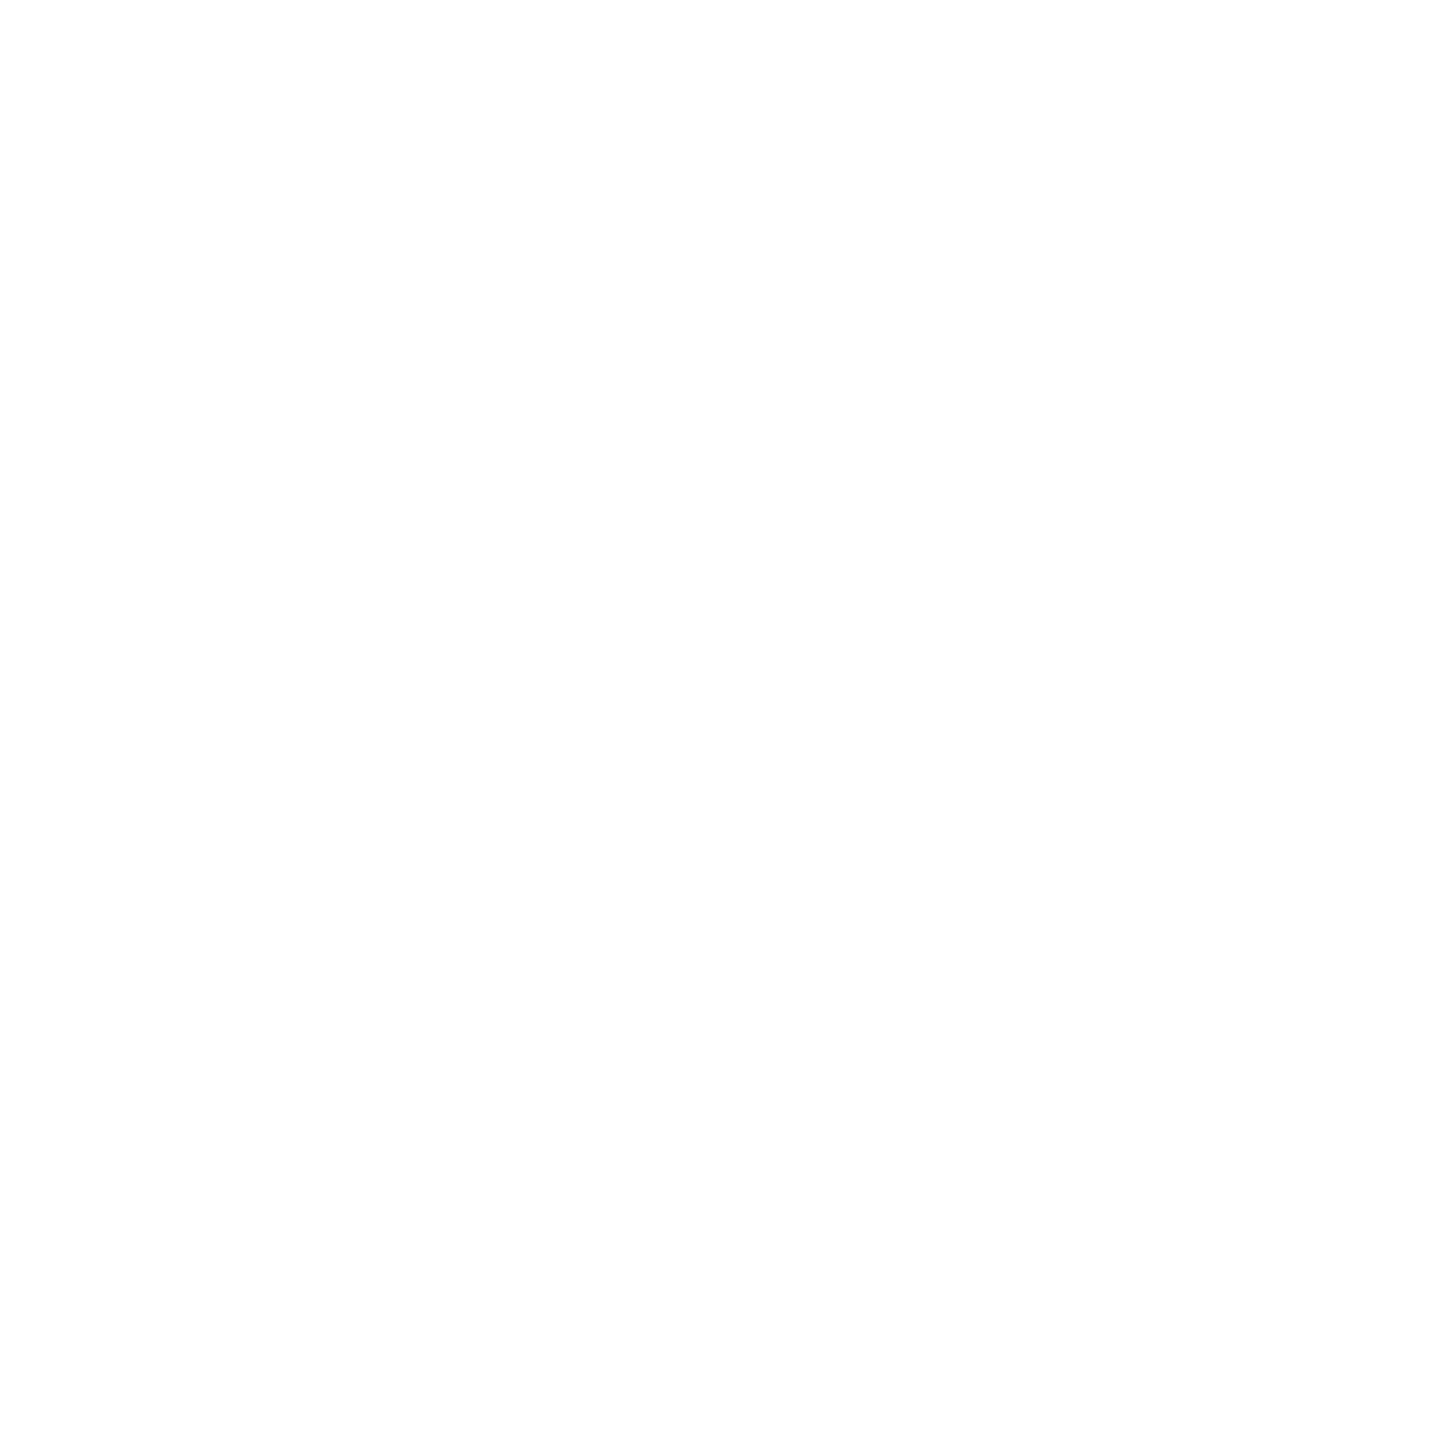

<IPython.core.display.Javascript object>


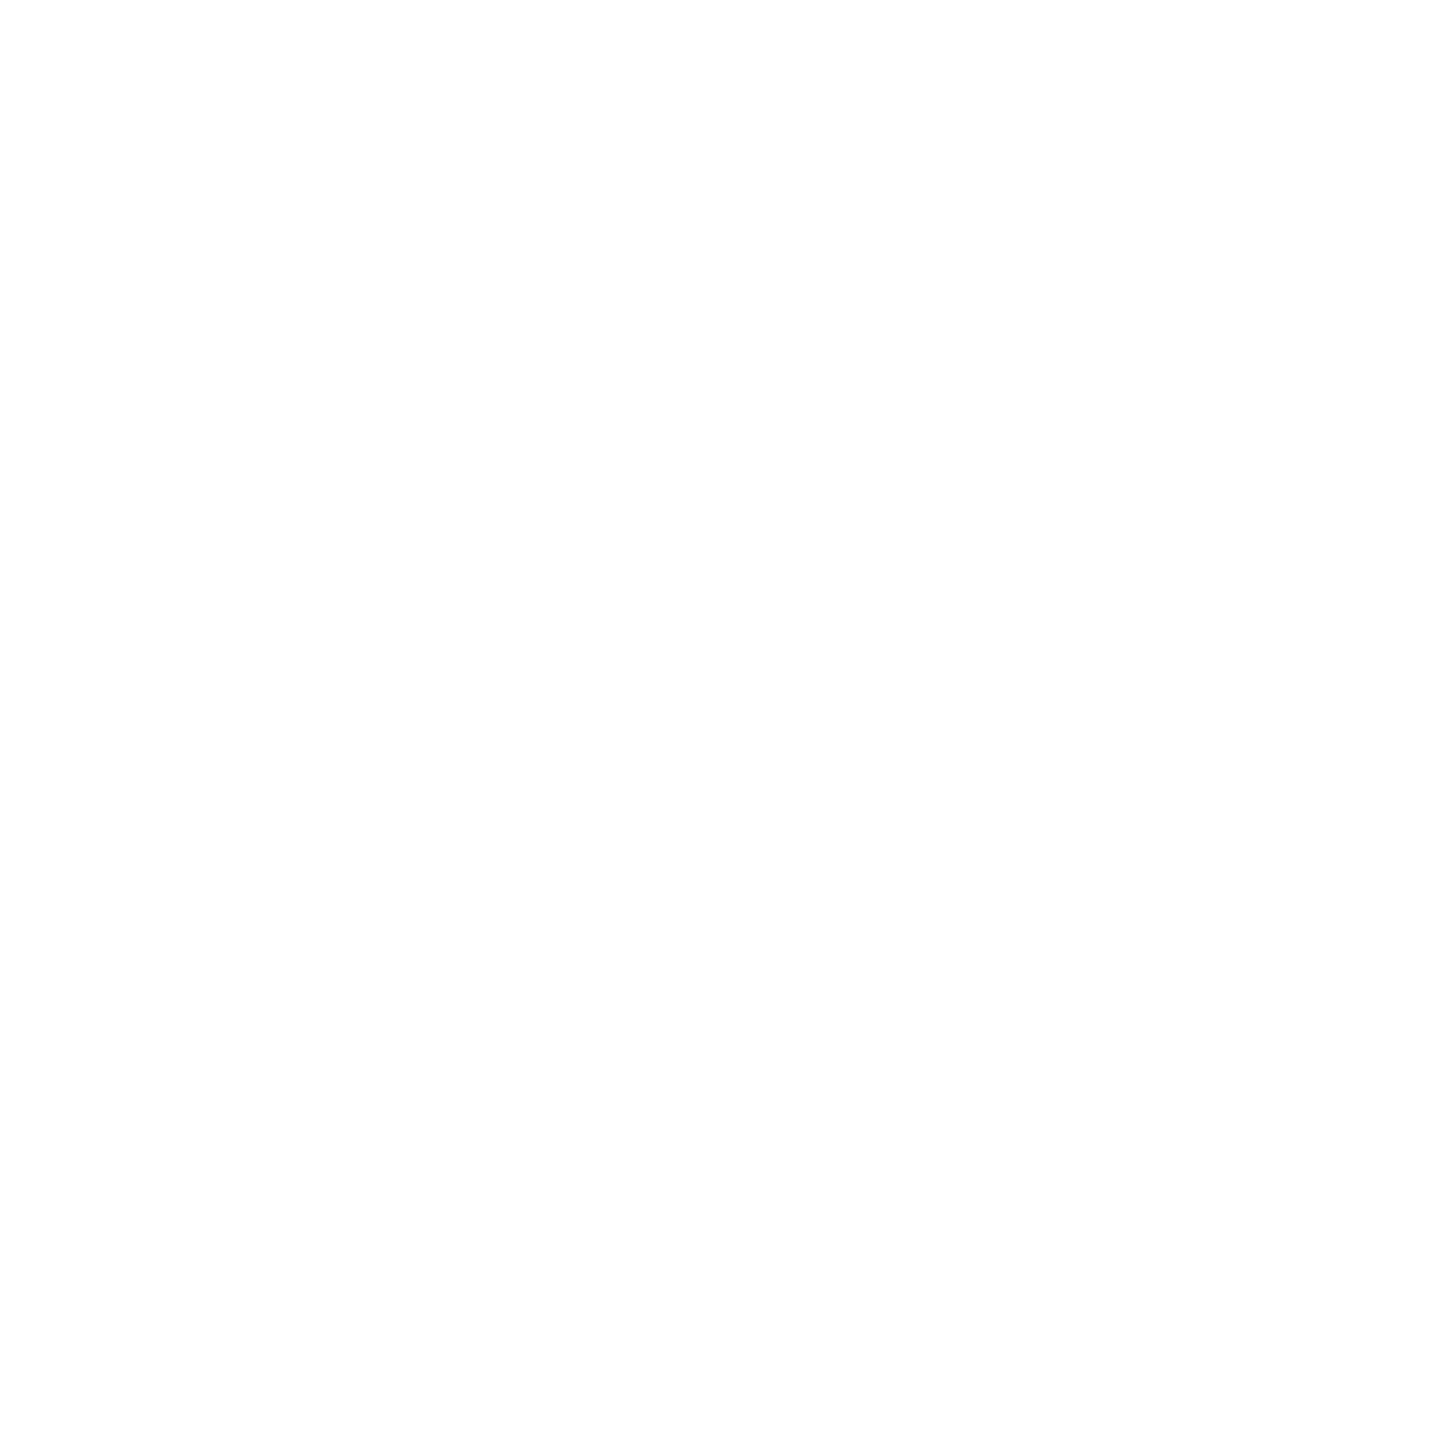

In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
plt.ylim([-.3,.3]); plt.xlim([-2,2])
ax = plt.gca()
plt.ion()
fig.show()
fig.canvas.draw()

for i in range(len(t)):
    th,phi,dth,dphi = y[i,0],y[i,1],y[i,2],y[i,3]
    x = th*.02
    ax.clear()
    plt.ylim([-.3,.3]); plt.xlim([-2,2])
    plt.gca().set_aspect('equal', adjustable='box')
    ax.plot(np.array([x,x+.1*2*np.sin(phi)]),
            np.array([0,2*.1*np.cos(phi)]),
            color=.5*np.array([1,1,1]),linewidth=12)
    circle(x,0,.02)
    ax.plot(np.array([-2,2]),
           np.array([-.02,-.02]),
           color=.3*np.array([1,1,1]))
    
    fig.canvas.draw()